In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('train.csv', usecols =['Age','Fare','Survived'])

In [3]:
df['Age'].dtype

dtype('float64')

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X[:5]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size =0.2, random_state = 42)

In [10]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\Hp\AppData\Local\Temp\ipykernel_8124\1290113517.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


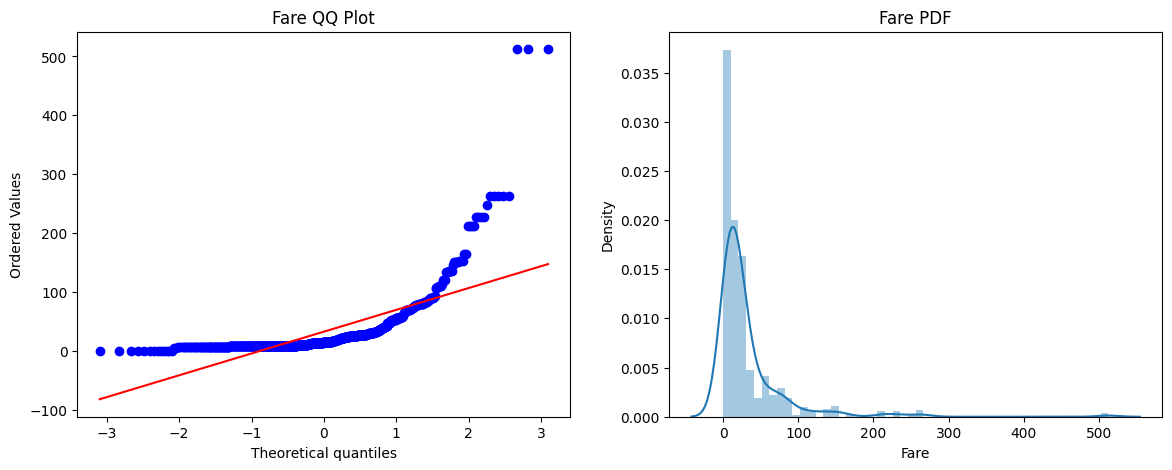

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)  
plt.title('Fare QQ Plot')


plt.subplot(122)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_8124\1826150339.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age PDF')

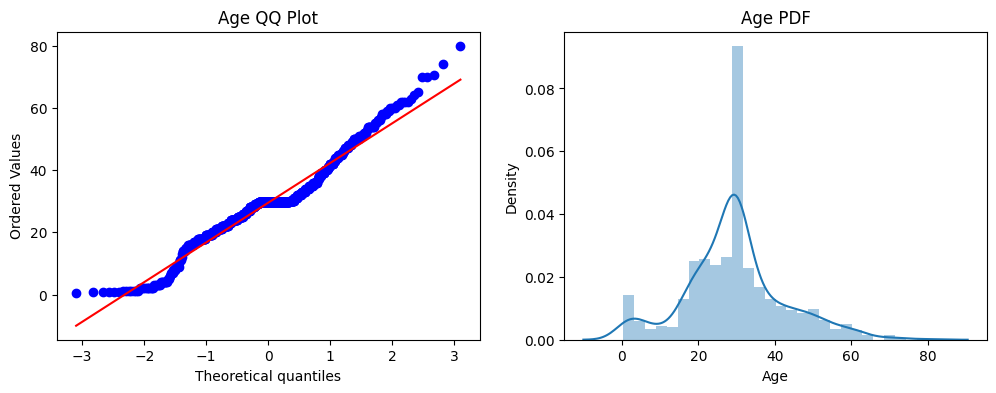

In [14]:
plt.figure(figsize = (12,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot = plt)
plt.title ('Age QQ Plot')

plt.subplot(122)
sns.distplot(X_train['Age'])
plt.title('Age PDF')          

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [22]:
print("Logistic Regression: ",accuracy_score(y_pred,y_test))
print("DecisisonTree: ", accuracy_score(y_pred2,y_test))

Logistic Regression:  0.6480446927374302
DecisisonTree:  0.664804469273743


# Now using FunctionTransformer

In [23]:
trf = FunctionTransformer(func = np.log1p)

In [37]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(X_test_transform)
y_pred2 = clf2.predict(X_test_transform)

In [28]:
print(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred2,y_test))

0.6815642458100558
0.6759776536312849


In [29]:
X_transform = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [30]:
print(np.mean(cross_val_score(clf,X_transform,y,scoring = 'accuracy', cv = 10)))
print(np.mean(cross_val_score(clf2,X_transform,y,scoring = 'accuracy', cv = 10)))

0.678027465667915
0.6599625468164794


Text(0.5, 1.0, 'Fare After Transformation')

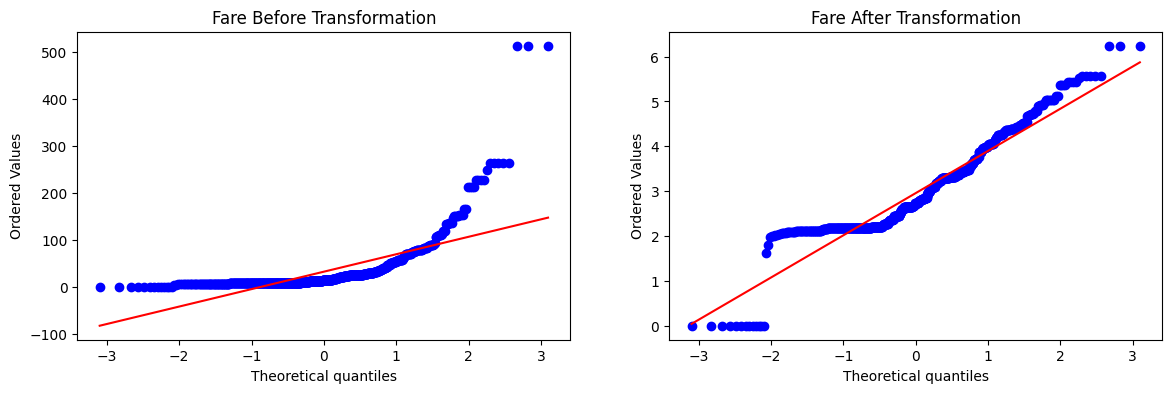

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Fare Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'],dist='norm', plot=plt)
plt.title('Fare After Transformation')

Text(0.5, 1.0, 'Age after Transformation')

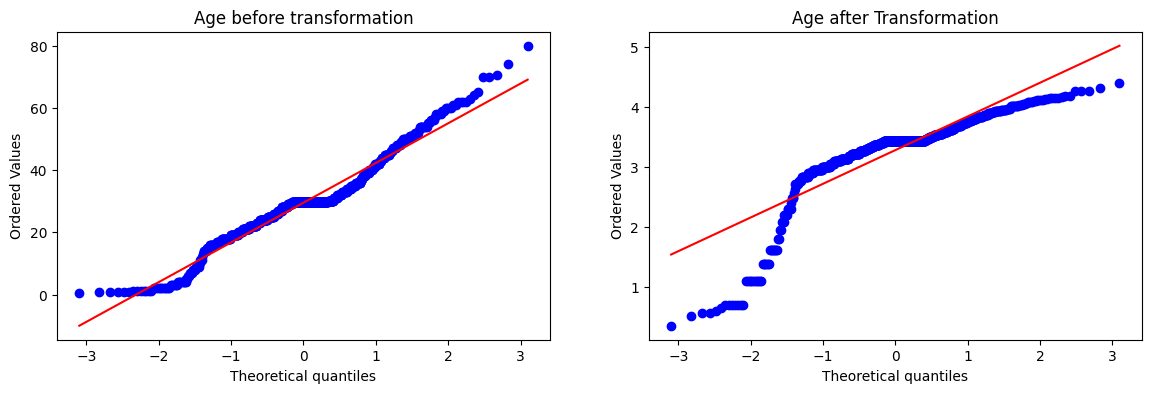

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm',plot = plt)
plt.title("Age before transformation")

plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist ='norm',plot = plt)
plt.title('Age after Transformation')

In [34]:
trf2 = ColumnTransformer([
    ('Trf2', FunctionTransformer(np.log1p),['Fare'])
],remainder = 'passthrough')

In [38]:
X_train_transform2 = trf2.fit_transform(X_train)
X_test_transform2 = trf2.transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transform2,y_train)
clf2.fit(X_train_transform2,y_train)

y_pred_transform = clf.predict(X_test_transform2)
y_pred_transform2 = clf2.predict(X_test_transform2)

In [45]:
print("LogisticRegression: ", accuracy_score(y_pred_transform,y_test))
print("DecisionTreeClassifier: ", accuracy_score(y_pred_transform2,y_test))


LogisticRegression:  0.6703910614525139
DecisionTreeClassifier:  0.6703910614525139
